In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.integrate
import scipy.interpolate
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from spectral import *
def diff(a, b):
    return 2*np.linalg.norm(a - b)/np.linalg.norm(a + b)

## Basic stuff

In [5]:
mesh_x = Wave(0.3)
mesh_y = Multidomain(Legendre(6), (1, 3, 4))
mesh = mesh_x*mesh_y
u = TensorField(mesh, np.random.randn(*mesh.shape) + 1j*np.random.randn(*mesh.shape))

In [6]:
print(diff(u.func, u().func))
print(diff(u.func, u(None).func))
print(diff(u.func, u(None, None).func))

0.0
0.0
0.0


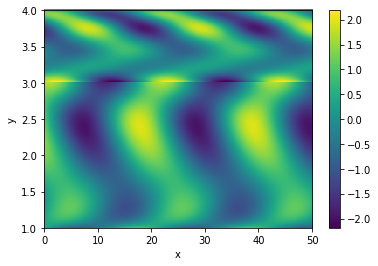

In [12]:
x = np.linspace(0, 50, 500)
y = np.linspace(*mesh_y.endpoints, 500)
heatmap(x, y, u(x, y).real)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [13]:
u2 = u.match_domains()
X, Y = mesh.grid()
diff(u2(X, Y), u2.func)

7.9380029566492913e-16

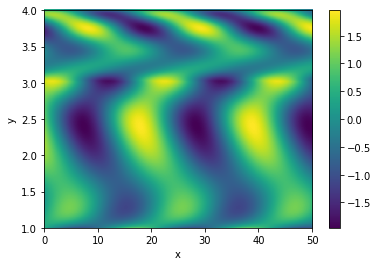

In [15]:
x = np.linspace(0, 50, 500)
y = np.linspace(*mesh_y.endpoints, 500)
heatmap(x, y, u2(x, y).real)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

## Differentiate

In [16]:
x = np.linspace(0, 50, 500)
y = np.linspace(*mesh_y.endpoints, 500)

du_dx = u.diff(0)
du_dy = u.diff(1)

dx_num, dy_num = np.gradient(u(x, y), x, y, edge_order=2)

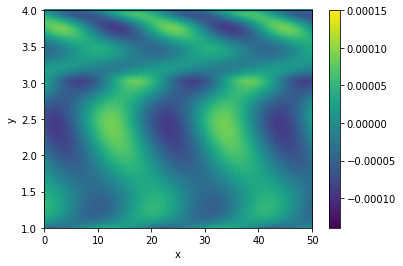

In [18]:
heatmap(x, y, (du_dx(x, y) - dx_num).real)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

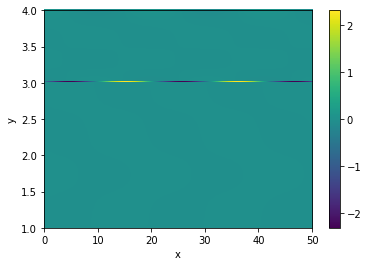

In [19]:
heatmap(x, y, (du_dy(x, y) - dy_num).real)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [20]:
diff(u.grad().div().func, u.laplacian().func)

0.0

## Integrate

In [23]:
y = np.linspace(*mesh_y.endpoints, 3000)
int_y = np.trapz(u(x, y).T, y, axis=0)
diff(u.int(1)(x), int_y)

3.2319121411733472e-06

## Trace and transpose

In [24]:
u2 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
diff(u2.trace().func, u2.func.trace())

0.0

In [25]:
diff(u2.T(6, 2), u2(6, 2).T)

0.0

In [26]:
diff(u2.T.func, u2.func.transpose(2, 1, 0, 3, 4))

0.0

## Matmul

In [28]:
X, Y = mesh.grid()
x = 0
y = Y[5]

In [29]:
u1 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(4, *mesh.shape))
diff((u1@u2)(x, y), u1(x, y)@u2(x, y))

5.7500079093485582e-16

In [30]:
u1 = TensorField(mesh, np.random.randn(2, 3, 4, *mesh.shape))
u2 = TensorField(mesh, np.random.randn(2, 4, 7, *mesh.shape))
diff((u1@u2)(x, y), u1(x, y)@u2(x, y))

1.0274472219292237e-15

## Determinant and cofactor matrix

In [31]:
u1 = TensorField(mesh, np.random.randn(3, 3, 4, *mesh.shape))
det = u1.det()
diff(det.func, np.linalg.det(u1.func.T).T)

2.5831505886040303e-16

In [32]:
u1 = TensorField(mesh, np.random.randn(3, 3, 4, *mesh.shape))
det = u1.det()
eyedet = np.eye(3)*det[:,None,None]
cf = u1.cofactor_matrix()
diff((cf.T@u1.T.transpose((0,2,1))).func, eyedet.func)

2.3634921760102249e-16

In [33]:
for n in range(1, 5):
    u1 = TensorField(mesh, np.random.randn(n, n, *mesh.shape))
    det = u1.det()
    eyedet = np.eye(n)*det
    cf = u1.cofactor_matrix()
    print(diff((cf.T@u1).func, eyedet.func))

0.0
4.99232665099e-17
1.67875278214e-16
5.21730634407e-16
